In [1]:
import km3pipe as kp
import numpy as np
from km3modules import StatusBar

    Installed: 6.0.1
    Latest: 6.0.2
Please run `pip install --upgrade km3pipe` to update.


In [2]:
class DOMHits(kp.Module):
    def configure(self):
        self.data_ndoms = []
        self.data_doms = []
        self.data_pmts = []
    def process(self, blob):
        hits = blob["Hits"]
        
        n_doms_hit = np.unique(hits.dom_id).shape[0]
        n_pmts_hit = np.unique(hits.channel_id).shape[0]
        
        doms_id = np.unique(hits.dom_id)
        pmts_id = hits.channel_id
        pmts_id_seq = np.unique(hits.pmt_id)
        
        self.data_doms.append(doms_id)
        self.data_ndoms.append(n_doms_hit)
        self.data_pmts.append(pmts_id)
        #print(pmts_id[:10])
        
    def finish(self):
        #print(len(self.data_doms), np.mean(self.data_doms))
        #print(self.data_doms)
        #print(len(self.data_pmts))
        #print(self.data_pmts)
        return


In [3]:
fname = '../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482.JTE.root'

In [4]:
pipe = kp.Pipeline()
pipe.attach(kp.io.JPPPump, filename=fname, with_timeslice_hits=False)
pipe.attach(StatusBar, every=50000)
pipe.attach(DOMHits, only_if="Hits")
#pipe.attach(DOMHits, only_if="TimesliceHits")
pipe.drain()

-----------------------[Blob       0]-----------------------
336 cycles drained in 0.62s (CPU 0.30s). Memory peak: 117.95 MB
Statistics are based on the last 335 cycles.
  wall  mean: 0.00s  medi: 0.00s  min: 0.00s  max: 0.01s  std: 0.00s
  CPU   mean: 0.00s  medi: 0.00s  min: 0.00s  max: 0.01s  std: 0.00s


In [5]:
doms_id = pipe.modules[2].data_doms

In [6]:
ndoms = pipe.modules[2].data_ndoms

In [7]:
pmt_ids = pipe.modules[2].data_pmts

In [8]:
pmt_ids

[array([ 7,  9,  9, 11, 16, 27,  7,  9, 10, 11, 12, 15, 18,  1], dtype=uint8),
 array([ 7, 19,  0,  4, 27,  1, 27,  5, 18,  7, 10,  0,  8,  2,  4,  4,  6,
         7,  8,  9, 10, 11], dtype=uint8),
 array([24, 28, 29, 30,  2,  4, 30,  2,  3,  4, 21, 23, 27, 29,  5,  9, 16,
         5,  7, 27, 28, 30,  1,  2,  3,  4,  6,  9, 11, 18,  0], dtype=uint8),
 array([ 1,  2, 11,  7, 11, 17, 16, 20, 17,  7,  9, 11, 12, 16,  0, 10,  4,
         8, 11], dtype=uint8),
 array([ 9, 12, 14,  1,  7, 10, 11, 16, 20,  1, 15, 15, 17,  7,  9, 26,  1,
         7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26,  1,  9, 10,
        24, 26,  8, 13, 19, 25, 29,  8, 21, 13, 20, 16, 17, 18,  6, 12], dtype=uint8),
 array([ 5,  7, 11, 16, 17,  1,  5,  7, 11, 27,  5,  7,  8,  9, 29, 15, 24], dtype=uint8),
 array([21,  4,  6,  8,  9, 13, 15, 21, 23, 25, 29,  0,  3,  4,  6, 19,  3,
        16, 20,  5, 27,  0,  2,  7,  9, 29], dtype=uint8),
 array([19, 21, 11, 21,  0,  6, 10, 15, 23,  1,  8,  6, 10,  4,  6, 23, 24,

In [9]:
for i in range(10):
    print(ndoms[i], list(doms_id[i]), len(pmt_ids[i]), list(pmt_ids[i]))

(3, [808430571, 808987051, 808996420], 14, [7, 9, 9, 11, 16, 27, 7, 9, 10, 11, 12, 15, 18, 1])
(7, [808430449, 808951763, 808961271, 808965918, 808976325, 808987120, 809003766], 22, [7, 19, 0, 4, 27, 1, 27, 5, 18, 7, 10, 0, 8, 2, 4, 4, 6, 7, 8, 9, 10, 11])
(4, [808467569, 808966287, 808974928, 808995481], 31, [24, 28, 29, 30, 2, 4, 30, 2, 3, 4, 21, 23, 27, 29, 5, 9, 16, 5, 7, 27, 28, 30, 1, 2, 3, 4, 6, 9, 11, 18, 0])
(5, [808430036, 808430571, 808966287, 808974928, 808995481], 19, [1, 2, 11, 7, 11, 17, 16, 20, 17, 7, 9, 11, 12, 16, 0, 10, 4, 8, 11])
(4, [808430449, 808447091, 808468365, 808987121], 50, [9, 12, 14, 1, 7, 10, 11, 16, 20, 1, 15, 15, 17, 7, 9, 26, 1, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 1, 9, 10, 24, 26, 8, 13, 19, 25, 29, 8, 21, 13, 20, 16, 17, 18, 6, 12])
(4, [808430036, 808430571, 808467569, 808981888], 17, [5, 7, 11, 16, 17, 1, 5, 7, 11, 27, 5, 7, 8, 9, 29, 15, 24])
(3, [808976325, 808987120, 808994625], 26, [21, 4, 6, 8, 9, 13, 15, 21, 23, 25, 29, 0, 3

In [4]:
import matplotlib.pyplot as plt

In [ ]:
n, bins = plt.hist(list(pmt_ids), 50, normed=1, facecolor='green', alpha=0.75)

In [12]:
!tohdf5 --jppy ../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482_opt.JTE.root

Filename in c++: ../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482_opt.JTE.root
Warning in <TClass::TClass>: no dictionary for class JTRIGGER::JTriggerParameters is available
Warning in <TClass::TClass>: no dictionary for class JTRIGGER::JTrigger3DShower::JParameters is available
Warning in <TClass::TClass>: no dictionary for class JTRIGGER::JTrigger3DMuon::JParameters is available
Warning in <TClass::TClass>: no dictionary for class JTRIGGER::JPrescaler is available
Filename in c++: ../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482_opt.JTE.root
-----------------------[Blob       0]-----------------------
-----------------------[Blob    1000]-----------------------
-----------------------[Blob    2000]-----------------------
-----------------------[Blob    3000]-----------------------
-----------------------[Blob    4000]-----------------------
Creating index tables. This may take a few minutes...
Traceback (most recent call last):
  File "/usr/local/bin/toh

In [2]:
!ls ../trigger_optimisation_files/realdata/

KM3NeT_00000014_00004482.JTE.root
KM3NeT_00000014_00004482.JTE.root.h5
KM3NeT_00000014_00004482_100ns.JTE.root
KM3NeT_00000014_00004482_150ns.JTE.root
KM3NeT_00000014_00004482_50ns.JTE.root
KM3NeT_00000014_00004482_opt.JTE.root


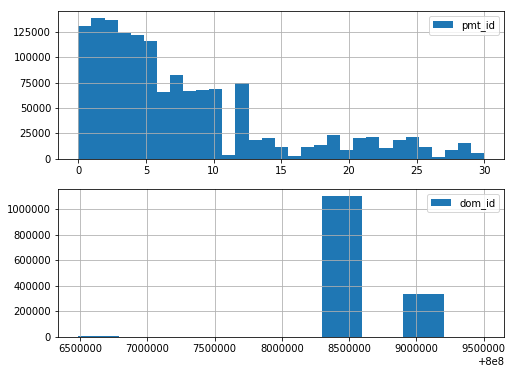

In [70]:
import numpy as np
import tables
from matplotlib import pyplot
%matplotlib inline 


h5 = tables.open_file('../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482_opt.JTE.root.h5')
# this is a numpy array
hits = h5.root.hits[:]

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#np.unique(hits.dom_id).shape[0]
ax1.hist(hits['channel_id'],31,label='pmt_id')
ax2.hist(hits['dom_id'], label='dom_id')

ax1.grid(True)
ax1.legend(loc='upper right')
ax2.grid(True)
ax2.legend(loc='upper_right')
plt.show()

In [72]:
hits['dom_id']

array([808430571, 808430571, 808987051, ..., 808451481, 808451481,
       808451481], dtype=uint32)

In [4]:
filename = "../trigger_optimisation_files/realdata/KM3NeT_00000014_00004482.JTE.root.h5"
pump = kp.io.hdf5.HDF5Pump(filename=filename)

In [5]:
blob=pump[0]

In [6]:
blob

{'EventInfo': Event #[0]:
     detector id:     [14]
     frame index:     [585]
     UTC seconds:     [1477058458]
     UTC nanoseconds: [500000000]
     MC id:           [0]
     MC time:         [ 0.]
     overlays:        [1]
     trigger counter: [2]
     trigger mask:    [18], 'Hits': HitSeries with 14 hits.}

In [7]:
hits=blob['Hits']

In [8]:
print(hits)

HitSeries with 14 hits.


In [9]:
print(hits.triggered)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
print(hits.time)

[31013306 31013308 31012709 31012716 31012707 31012724 31012986 31012975
 31012984 31012989 31012984 31012999 31012990 31012990]


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import km3pipe.style
km3pipe.style.use('talk')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


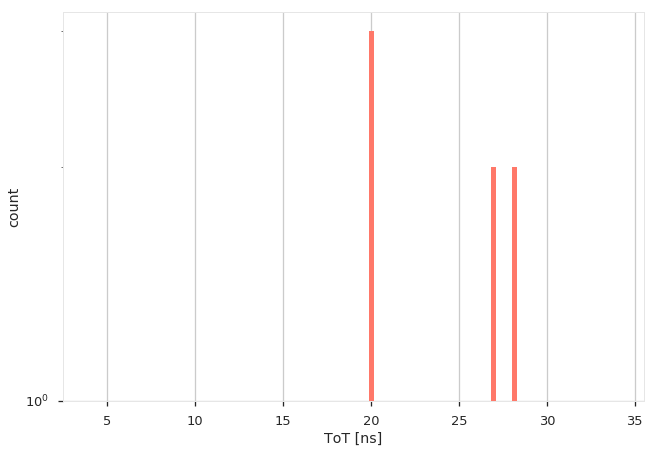

In [15]:
plt.hist(hits.tot, bins=100, log=True);
plt.xlabel("ToT [ns]");
plt.ylabel("count");

336 cycles drained in 1.42s (CPU 1.39s). Memory peak: 162.23 MB
Statistics are based on the last 335 cycles.
  wall  mean: 0.00s  medi: 0.00s  min: 0.00s  max: 0.02s  std: 0.00s
  CPU   mean: 0.00s  medi: 0.00s  min: 0.00s  max: 0.02s  std: 0.00s


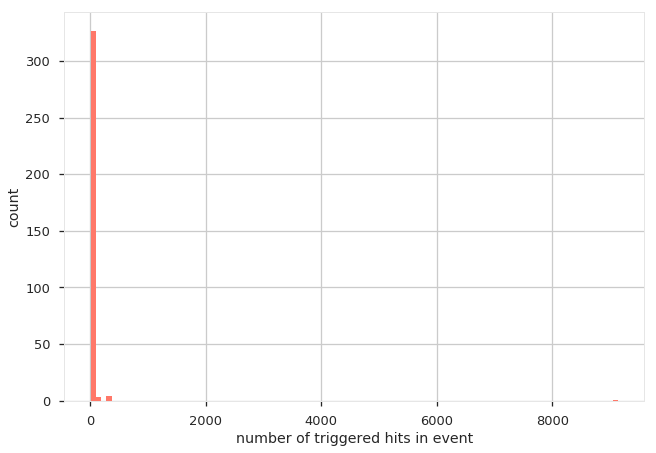

In [16]:
class TriggeredHits(kp.Module):
    def configure(self):
        self.n_triggered = []
        
    def process(self, blob):
        self.n_triggered.append(np.sum(blob['Hits'].triggered))
        return blob
    
    def finish(self):
        plt.hist(self.n_triggered, bins=100)
        plt.xlabel("number of triggered hits in event")
        plt.ylabel("count")

pipe = kp.Pipeline()
pipe.attach(kp.io.hdf5.HDF5Pump, filename=filename)
pipe.attach(TriggeredHits)
pipe.drain()